In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re    
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob


In [54]:
data1 = pd.read_csv("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Text Mining/archive/Amazon Reviews.csv")

In [48]:
data1

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review

In [61]:
data = data1['reviews.text']
data = pd.DataFrame(data)
data

,reviews.text
0,I order 3 of them and one of the item is bad q...
1,Bulk is always the less expensive way to go fo...
2,Well they are not Duracell but for the price i...
3,Seem to work as well as name brand batteries a...
4,These batteries are very long lasting the pric...
...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...
28328,I bought this for my niece for a Christmas gif...
28329,"Very nice for light internet browsing, keeping..."
28330,This Tablet does absolutely everything I want!...


In [62]:
data = data.rename(columns={"reviews.text":"Text"})

In [63]:
data

,Text
0,I order 3 of them and one of the item is bad q...
1,Bulk is always the less expensive way to go fo...
2,Well they are not Duracell but for the price i...
3,Seem to work as well as name brand batteries a...
4,These batteries are very long lasting the pric...
...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...
28328,I bought this for my niece for a Christmas gif...
28329,"Very nice for light internet browsing, keeping..."
28330,This Tablet does absolutely everything I want!...


In [64]:
data.isnull().sum()

Text    0
dtype: int64

In [65]:
stemmer_func = nltk.stem.snowball.SnowballStemmer("english").stem

In [66]:
lemmatizer = WordNetLemmatizer()

In [67]:
stop = set(stopwords.words('english'))

In [68]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [69]:
data['Text'] = data.Text.apply(clean)
data.Text

0        i order  of them and one of the item is bad qu...
1        bulk is always the less expensive way to go fo...
2        well they are not duracell but for the price i...
3        seem to work as well as name brand batteries a...
4        these batteries are very long lasting the pric...
                               ...                        
28327    i got  of these for my  yr old twins my  yr ol...
28328    i bought this for my niece for a christmas gif...
28329    very nice for light internet browsing keeping ...
28330    this tablet does absolutely everything i want ...
28331    at ninety dollars the expectionations are low ...
Name: Text, Length: 28332, dtype: object

In [70]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq

the          28836
and          22302
i            20586
to           19537
for          17918
a            17599
it           16792
is           11481
my           11149
this         10420
great         9362
of            8408
batteries     8044
as            7656
tablet        6580
with          6044
in            5892
good          5845
that          5654
have          5635
dtype: int64

In [71]:
data['token_tweets'] = data['Text'].apply(word_tokenize)

In [72]:
data.head()

,Text,token_tweets
0,i order of them and one of the item is bad qu...,"[i, order, of, them, and, one, of, the, item, ..."
1,bulk is always the less expensive way to go fo...,"[bulk, is, always, the, less, expensive, way, ..."
2,well they are not duracell but for the price i...,"[well, they, are, not, duracell, but, for, the..."
3,seem to work as well as name brand batteries a...,"[seem, to, work, as, well, as, name, brand, ba..."
4,these batteries are very long lasting the pric...,"[these, batteries, are, very, long, lasting, t..."


In [73]:
def lemma(text):
    lemma_token = " "
    for word in text:
        lemma = word
        lemma_token = lemma_token + " " + lemma
    return lemma_token

In [74]:
data['Lemma_tweets'] = data['token_tweets'].apply(lemma)
data.head()

,Text,token_tweets,Lemma_tweets
0,i order of them and one of the item is bad qu...,"[i, order, of, them, and, one, of, the, item, ...",i order of them and one of the item is bad q...
1,bulk is always the less expensive way to go fo...,"[bulk, is, always, the, less, expensive, way, ...",bulk is always the less expensive way to go ...
2,well they are not duracell but for the price i...,"[well, they, are, not, duracell, but, for, the...",well they are not duracell but for the price...
3,seem to work as well as name brand batteries a...,"[seem, to, work, as, well, as, name, brand, ba...",seem to work as well as name brand batteries...
4,these batteries are very long lasting the pric...,"[these, batteries, are, very, long, lasting, t...",these batteries are very long lasting the pr...


In [75]:
data.shape

(28332, 3)

## Wordcloud

In [76]:
string_Total = " ".join(data["Text"])

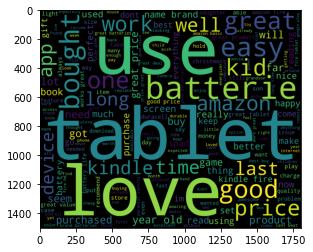

In [77]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

## sentiment analysis using textblob

In [78]:
clean_data = data['Lemma_tweets']

In [79]:
clean_data.head()

0      i order of them and one of the item is bad q...
1      bulk is always the less expensive way to go ...
2      well they are not duracell but for the price...
3      seem to work as well as name brand batteries...
4      these batteries are very long lasting the pr...
Name: Lemma_tweets, dtype: object

In [80]:
data['textblob_sentiment_polarity'] = data["Lemma_tweets"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [81]:
data['textblob_sentiment_subjectivity'] = data["Lemma_tweets"].apply(lambda x: TextBlob(x).sentiment.subjectivity )

In [82]:
data.head()

,Text,token_tweets,Lemma_tweets,textblob_sentiment_polarity,textblob_sentiment_subjectivity
0,i order of them and one of the item is bad qu...,"[i, order, of, them, and, one, of, the, item, ...",i order of them and one of the item is bad q...,-0.450000,0.358333
1,bulk is always the less expensive way to go fo...,"[bulk, is, always, the, less, expensive, way, ...",bulk is always the less expensive way to go ...,-0.333333,0.383333
2,well they are not duracell but for the price i...,"[well, they, are, not, duracell, but, for, the...",well they are not duracell but for the price...,0.800000,1.000000
3,seem to work as well as name brand batteries a...,"[seem, to, work, as, well, as, name, brand, ba...",seem to work as well as name brand batteries...,0.500000,0.500000
4,these batteries are very long lasting the pric...,"[these, batteries, are, very, long, lasting, t...",these batteries are very long lasting the pr...,0.245000,0.423333


In [83]:
data.shape

(28332, 5)

In [84]:
def sentiment_analysis(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [85]:
data['sentiment_textblob'] = data['textblob_sentiment_polarity'].apply(sentiment_analysis)

In [86]:
data[['Text', 'textblob_sentiment_polarity','sentiment_textblob']].head(20)

,Text,textblob_sentiment_polarity,sentiment_textblob
0,i order of them and one of the item is bad qu...,-0.450000,Negative
1,bulk is always the less expensive way to go fo...,-0.333333,Negative
2,well they are not duracell but for the price i...,0.800000,Positive
3,seem to work as well as name brand batteries a...,0.500000,Positive
4,these batteries are very long lasting the pric...,0.245000,Positive
5,bought a lot of batteries for christmas and th...,0.350000,Positive
6,ive not had any problame with these batteries ...,0.200000,Positive
7,well if you are looking for cheap nonrechargea...,0.475000,Positive
8,these do not hold the amount of high power jui...,-0.003333,Negative
9,amazonbasics aa aaa batteries have done well b...,0.100000,Positive


In [87]:
data.shape

(28332, 6)

In [88]:
data.sentiment_textblob.value_counts()

Positive    23754
Neutral      2414
Negative     2164
Name: sentiment_textblob, dtype: int64

## sentiment analysis using VADER

In [89]:
nltk.download('vader_lexicon')

sentiments = SentimentIntensityAnalyzer()

data["vadar_Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Lemma_tweets"]]
data["vadar_Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Lemma_tweets"]]
data["vadar_Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Lemma_tweets"]]
data["vadar_Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["Lemma_tweets"]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHIVAM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [90]:
data[['Text', 'textblob_sentiment_polarity','sentiment_textblob', 'vadar_Positive', 'vadar_Negative', 'vadar_Neutral', 'vadar_Compound']].head(20)

,Text,textblob_sentiment_polarity,sentiment_textblob,vadar_Positive,vadar_Negative,vadar_Neutral,vadar_Compound
0,i order of them and one of the item is bad qu...,-0.450000,Negative,0.000,0.186,0.814,-0.6908
1,bulk is always the less expensive way to go fo...,-0.333333,Negative,0.172,0.000,0.828,0.3612
2,well they are not duracell but for the price i...,0.800000,Positive,0.423,0.000,0.577,0.7650
3,seem to work as well as name brand batteries a...,0.500000,Positive,0.312,0.000,0.688,0.6124
4,these batteries are very long lasting the pric...,0.245000,Positive,0.313,0.000,0.687,0.6249
5,bought a lot of batteries for christmas and th...,0.350000,Positive,0.209,0.000,0.791,0.8625
6,ive not had any problame with these batteries ...,0.200000,Positive,0.166,0.000,0.834,0.4927
7,well if you are looking for cheap nonrechargea...,0.475000,Positive,0.234,0.000,0.766,0.7003
8,these do not hold the amount of high power jui...,-0.003333,Negative,0.174,0.000,0.826,0.4215
9,amazonbasics aa aaa batteries have done well b...,0.100000,Positive,0.210,0.118,0.672,0.2960


In [91]:
# function to analyse vadar sentiments
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'


In [92]:
data['sentiments_vadar'] = data['vadar_Compound'].apply(vader_analysis)
data.head()

,Text,token_tweets,Lemma_tweets,textblob_sentiment_polarity,textblob_sentiment_subjectivity,sentiment_textblob,vadar_Positive,vadar_Negative,vadar_Neutral,vadar_Compound,sentiments_vadar
0,i order of them and one of the item is bad qu...,"[i, order, of, them, and, one, of, the, item, ...",i order of them and one of the item is bad q...,-0.450000,0.358333,Negative,0.000,0.186,0.814,-0.6908,Negative
1,bulk is always the less expensive way to go fo...,"[bulk, is, always, the, less, expensive, way, ...",bulk is always the less expensive way to go ...,-0.333333,0.383333,Negative,0.172,0.000,0.828,0.3612,Neutral
2,well they are not duracell but for the price i...,"[well, they, are, not, duracell, but, for, the...",well they are not duracell but for the price...,0.800000,1.000000,Positive,0.423,0.000,0.577,0.7650,Positive
3,seem to work as well as name brand batteries a...,"[seem, to, work, as, well, as, name, brand, ba...",seem to work as well as name brand batteries...,0.500000,0.500000,Positive,0.312,0.000,0.688,0.6124,Positive
4,these batteries are very long lasting the pric...,"[these, batteries, are, very, long, lasting, t...",these batteries are very long lasting the pr...,0.245000,0.423333,Positive,0.313,0.000,0.687,0.6249,Positive


In [93]:
data.shape

(28332, 11)

In [94]:
output_data = data[['Text', 'textblob_sentiment_polarity','sentiment_textblob', 'vadar_Positive', 'vadar_Negative', 'vadar_Neutral', 'vadar_Compound', 'sentiments_vadar']]

In [95]:
output_data.head(50)

,Text,textblob_sentiment_polarity,sentiment_textblob,vadar_Positive,vadar_Negative,vadar_Neutral,vadar_Compound,sentiments_vadar
0,i order of them and one of the item is bad qu...,-0.450000,Negative,0.000,0.186,0.814,-0.6908,Negative
1,bulk is always the less expensive way to go fo...,-0.333333,Negative,0.172,0.000,0.828,0.3612,Neutral
2,well they are not duracell but for the price i...,0.800000,Positive,0.423,0.000,0.577,0.7650,Positive
3,seem to work as well as name brand batteries a...,0.500000,Positive,0.312,0.000,0.688,0.6124,Positive
4,these batteries are very long lasting the pric...,0.245000,Positive,0.313,0.000,0.687,0.6249,Positive
5,bought a lot of batteries for christmas and th...,0.350000,Positive,0.209,0.000,0.791,0.8625,Positive
6,ive not had any problame with these batteries ...,0.200000,Positive,0.166,0.000,0.834,0.4927,Neutral
7,well if you are looking for cheap nonrechargea...,0.475000,Positive,0.234,0.000,0.766,0.7003,Positive
8,these do not hold the amount of high power jui...,-0.003333,Negative,0.174,0.000,0.826,0.4215,Neutral
9,amazonbasics aa aaa batteries have done well b...,0.100000,Positive,0.210,0.118,0.672,0.2960,Neutral
